Scream4Cream Business Plan

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

In [31]:
df = pd.DataFrame(pd.read_csv("IceCreamData.csv"))

In [32]:
#Show first 5 rows in dataset

df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


VISUALIZE DATASET - DESCRIPTIVE METHOD

In [33]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


Scatterplot graph:

<Axes: xlabel='Temperature', ylabel='Revenue'>

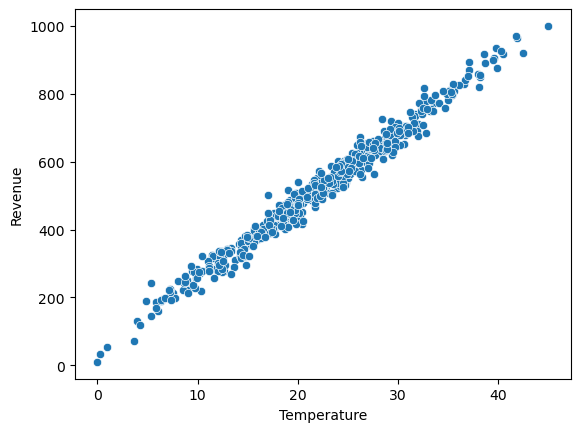

In [34]:
sns.scatterplot(data=df, x="Temperature", y="Revenue")

In this scatterplot we can see a clear linear relationship between the rise in temperature to the rise in revenue.

Heatmap graph:

<Axes: >

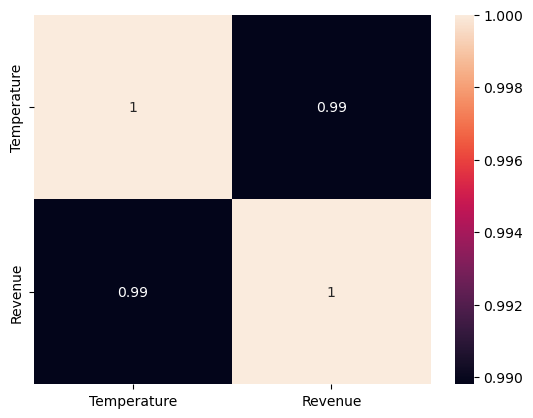

In [35]:
sns.heatmap(df.corr(),annot=True)

This heatmap shows a high correlation between the temperature and revenue in our dataset.

In [36]:
#Split data for training and testing, 80/20 ratio
data = df.values
x, y = data[:,:-1], data[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

MODEL THE DATA - NON-DESCRIPTIVE METHOD

In [37]:
model = LinearRegression()

In [38]:
model.fit(x_train, y_train)

LinearRegression()

Supervised machine learning - Linear regression model:

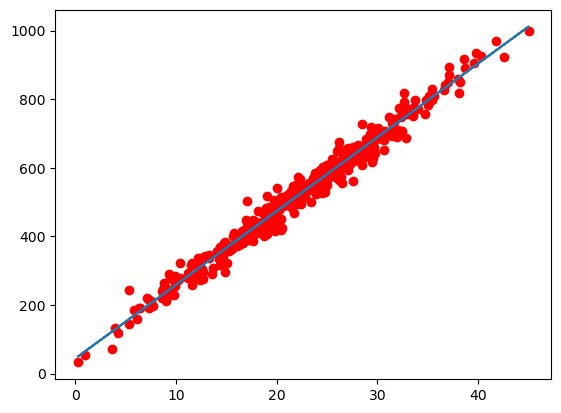

In [39]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train))

This linear regression model shows an excellent way in predicting revenue values based on outside temperature values.

PREDICT THE REVENUE DATA

In [40]:
y_pred = model.predict(x_test.reshape(-1,1))

In the dataframe below, we can see the Actual Revenue values compared to the Predicted Revenue values

In [41]:
comparison_result = pd.DataFrame({'Actual Revenue':y_test.reshape(-1),'Predicted Revenue':y_pred.reshape(-1)})
comparison_result

,Actual Revenue,Predicted Revenue
0,704.281439,698.338556
1,632.901914,653.323311
2,662.558990,664.730275
3,449.813300,450.519285
4,636.298374,665.474697
...,...,...
95,506.222379,465.780600
96,749.367154,758.745585
97,684.158444,711.301255
98,381.564135,394.456810


Using the R-square metric, we can accurately reflect the percentage of the dependent variable variation

In [42]:
# R-square metric accurately reflects the percentage of the dependent variable variation that the linear model explains
r2_score(y_test,y_pred)

0.9837324255882576

Our linear regression model gives us a 98% success rate in predicting values. That's great!

SHOULD Scream4Cream OPEN FOR BUSINESS TODAY?

In [43]:
#Scream4Cream's current overhead costs are $379.23
#Therefore, to generate an income, the predicted revenue must be greater than that value
overhead_costs = 379.23

In [63]:
#Determine what temperature it needs to be outside to be profitable
#Show all data with Revenue greater than overhead costs
df2 = df[df['Revenue'] > overhead_costs]

In [64]:
#Convert min temperature to fahrenheit for easier user experience
min_temp_c = df2['Temperature'].min()
min_temp_f = ((min_temp_c * (9 / 5)) + 32)

Please enter today's outside temperature (in F):

In [62]:
#Interactive element - user inputs today's temperature
#Compare the min temp with today's current temp to determine whether to open for business
def f(Temp):
    if int(Temp) > min_temp_f:
        print("Open for business")
    else:
        print("Do not open for business")
    return;

interact(f, Temp=widgets.FloatText(min=0, max=120, step=1));

interactive(children=(FloatText(value=0.0, description='Temp', step=1.0), Output()), _dom_classes=('widget-int…